### Scope

#### Problems
More than 600 threatened and endangered species currently reside in national parks in the United States. Learning more about the species and its location will help National Park Service better protect and foster.
1. What are the most common species in each national park? or as a whole?
2. What is the distribution of each species in each national park? or as a whole?
3. Which national park foster the most endangered species?

#### Goals
1. Identify the species category distribution in each national park and as a whole.
2. Identify the most common endangered species category in each park and as a whole.
3. Identify the most observed endangered species and their common names.
4. Find the park that has the most endangered species.
5. Find out associations between location and species.

#### Actions
1. With data analysis support, National Park Services can seek investments for staffing and management upgrades, and drive better legislations and science-based policies so that these endangered species can be taken care of.
2. Establish a community by reaching to the general public and spreading the knowledge, so people have higher awareness towards endangered species.

#### Data
I will majorly look at two files:
1. species_info.csv
2. observations.csv

#### Analysis
1. Description
2. Detection
3. Optimization
    - based on description and detection analysis, determine which national park and state should conduct more research on certain endangered species, receive more staffing. Which state should employ new policies, etc.
    
### Problems:
The datasets I used only include observed species in four national parks. There might be species that have yet to be explored. 
Another problem is the datasets only include four out of 423 national parks in the United States. Further research can include more national parks.
Thus, the analysis only involves the species that are recorded.

### Conclusion:
- Overall:
    1. There are seven species categories recorded in the U.S.: 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant'. Among them, vascular plant has the highest count, around 4,500.
    2. In all species with a conservation status, bird category has the highest species count for species of concern. Mammal category has the highest species count for endangered species in all four parks.

- Endangered Species:
    1. Yellowstone National Park has the most observations for endangered species, around 250 observations.
    2. Wolf/gray wolf is the most observed endangered species in all four national parks, almost three times more than the second most observed species for all parks.
    3. Mammals accounts for 50% of observed endangered species in all four parks.
    4. Fish and bird are second and third most observed endangered species categories in all four parks.

In [1]:
# import libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [3]:
# load two datasets
species_info = pd.read_csv('species_info.csv')
observation = pd.read_csv('observations.csv')

### EDA

In [4]:
# inspect species_info
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
species_info.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Procyon lotor,Dicranum Moss,Species of Concern
freq,4470,3,7,161


In [72]:
# when looking at the dataframe, I found out that there are duplicate rows that have same scientific_name but different common_names, I will drop all duplicates like this.
species_info[species_info['scientific_name'] == 'Pandion haliaetus']

,category,scientific_name,common_names,conservation_status
104,Bird,Pandion haliaetus,Osprey,Species of Concern
3081,Bird,Pandion haliaetus,"Osprey, Western Osprey",Species of Concern


In [73]:
species_info = species_info.drop_duplicates('scientific_name', keep='last')
species_info.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5541,5541,5541,179
unique,7,5541,5231,4
top,Vascular Plant,Aira caryophyllea,Dicranum Moss,Species of Concern
freq,4262,1,7,151


In [133]:
species_info.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [74]:
# by using value_counts method, we can see that there are 16 endangered species.
species_info.conservation_status.value_counts()

Species of Concern    151
Endangered             15
Threatened             10
In Recovery             3
Name: conservation_status, dtype: int64

In [75]:
# use groupby method to see the exact distribution of each species category
order = species_info.groupby('category').scientific_name.count().sort_values(ascending=False).reset_index()
print(order)

            category  scientific_name
0     Vascular Plant             4262
1               Bird              488
2  Nonvascular Plant              333
3             Mammal              176
4               Fish              125
5          Amphibian               79
6            Reptile               78


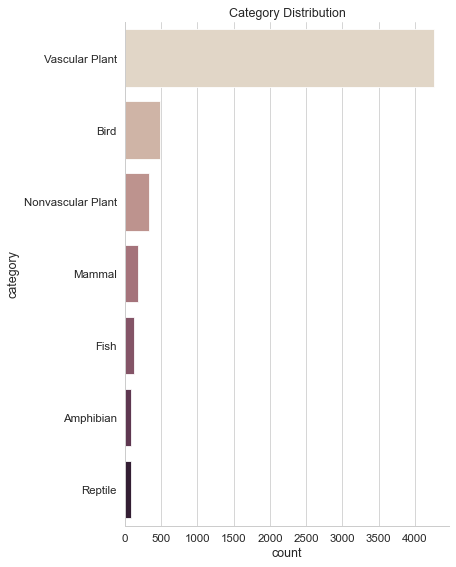

In [76]:
# plot a bar graph to see distribution of each species category
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.3)
sns.set_palette('Set2')
ax = sns.catplot(data=species_info, y='category', kind='count', palette="ch:.25", orient='h', order=species_info.category.value_counts().index, )
ax.fig.set_figwidth(7)
ax.fig.set_figheight(8)
plt.title('Category Distribution')
plt.show()

In [77]:
# create a new dataframe with rows that have conservation status
new_species_info = species_info.dropna()
new_species_info.head()

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
9,Mammal,Canis rufus,Red Wolf,Endangered
33,Mammal,Myotis austroriparius,"Mississippi Myotis, Southeastern Myotis",Species of Concern
34,Mammal,Myotis grisescens,Gray Myotis,Endangered
35,Mammal,Myotis keenii,Keen's Myotis,Species of Concern


<Figure size 432x288 with 0 Axes>

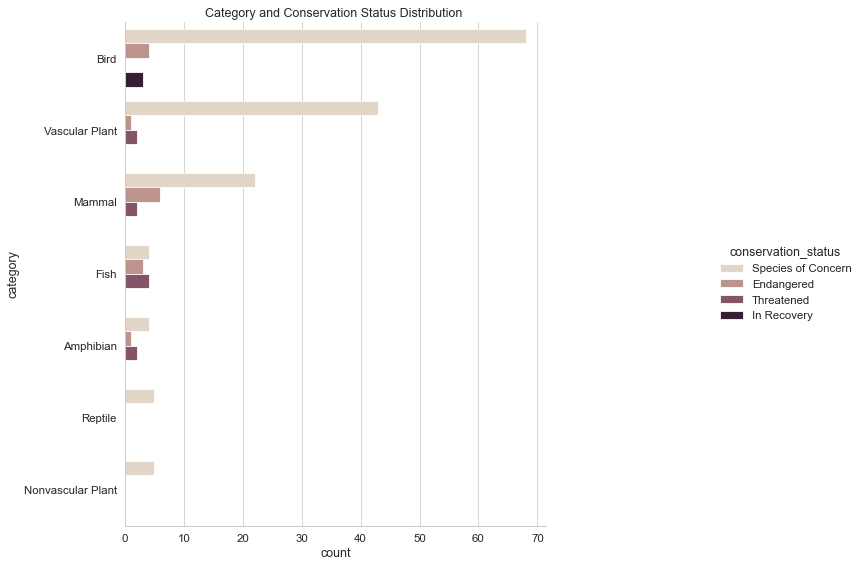

In [78]:
# create a new bar graph that shows each category distribution according to conservation_status
plt.clf()
sns.set_context('paper', font_scale=1.3)
sns.set_style('whitegrid')
ax1 = sns.catplot(kind='count', data=new_species_info, y='category', hue='conservation_status', order=new_species_info.category.value_counts().index, palette="ch:.25")
ax1.fig.set_figwidth(15)
ax1.fig.set_figheight(8)
plt.title('Category and Conservation Status Distribution ')
plt.show()

From the bar plot above, we can see:
- Bird category accounts for the most count of species of concern, followed by Vascular Plant and Mammal. 
- Fish and Amphibian, Reptile and Nonvascular Plant have similar counts for species of concern. 
- Mammal has the most count for endangered species, followed by Bird, Fish, and Amphibian. 
- Reptile and Nonvascular Plant has no endangered, threatened, or in-recovery species.

In [47]:
# inspect observation
observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [71]:
observation[observation['scientific_name'] == 'Pandion haliaetus']

,scientific_name,park_name,observations
200,Pandion haliaetus,Yosemite National Park,134
2389,Pandion haliaetus,Great Smoky Mountains National Park,58
2395,Pandion haliaetus,Bryce National Park,72
2585,Pandion haliaetus,Yellowstone National Park,223
3526,Pandion haliaetus,Yosemite National Park,148
5514,Pandion haliaetus,Yellowstone National Park,243
7153,Pandion haliaetus,Bryce National Park,82
15281,Pandion haliaetus,Great Smoky Mountains National Park,80


In [48]:
observation.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Hypochaeris radicata,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [52]:
# use groupby to see total observations in each park
park_observation = observation.groupby('park_name').observations.sum().reset_index()
park_observation

,park_name,observations
0,Bryce National Park,576025
1,Great Smoky Mountains National Park,431820
2,Yellowstone National Park,1443562
3,Yosemite National Park,863332


In [79]:
# create a list of all species with conservation_staus
species_with_status = new_species_info.scientific_name.unique()

In [80]:
# create a sub dataframe from observation only species with observation status
park_species_with_status = []
for element in observation.scientific_name.unique():
    if element in species_with_status:
        park_species_with_status.append(element)
    else:
        continue
    
df_park_with_status = observation[observation.scientific_name.isin(park_species_with_status)]
df_park_with_status.head()


,scientific_name,park_name,observations
24,Zizia trifoliata,Yosemite National Park,135
36,Camissonia sierrae ssp. alticola,Bryce National Park,84
71,Tofieldia glabra,Great Smoky Mountains National Park,75
94,Accipiter cooperii,Bryce National Park,95
118,Dichanthelium acuminatum var. acuminatum,Yosemite National Park,123


In [81]:
# create a final dataframe by inner merging df_park_with_status and new_species_info
# the final dataframe will have all the information we need for analysis
observation_species = pd.merge(df_park_with_status, new_species_info, how='inner', on='scientific_name')
observation_species.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
1,Zizia trifoliata,Yellowstone National Park,238,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
2,Zizia trifoliata,Bryce National Park,87,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
3,Zizia trifoliata,Great Smoky Mountains National Park,80,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
4,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern


In [82]:
observation_species.describe(include='all')

,scientific_name,park_name,observations,category,common_names,conservation_status
count,768,768,768.000000,768,768,768
unique,179,4,NaN,7,179,4
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN,Bird,Little Brown Myotis,Species of Concern
freq,12,192,NaN,316,12,644
mean,NaN,NaN,117.328125,NaN,NaN,NaN
std,NaN,NaN,64.758415,NaN,NaN,NaN
min,NaN,NaN,11.000000,NaN,NaN,NaN
25%,NaN,NaN,67.000000,NaN,NaN,NaN
50%,NaN,NaN,104.500000,NaN,NaN,NaN
75%,NaN,NaN,150.000000,NaN,NaN,NaN


In [96]:
endangered_species_observation = observation_species[observation_species.conservation_status == 'Endangered']
endangered_species_observation.describe(include='all')

,scientific_name,park_name,observations,category,common_names,conservation_status
count,68,68,68.000000,68,68,68
unique,15,4,NaN,5,15,1
top,Canis lupus,Great Smoky Mountains National Park,NaN,Mammal,"Gray Wolf, Wolf",Endangered
freq,12,17,NaN,32,12,68
mean,NaN,NaN,41.147059,NaN,NaN,NaN
std,NaN,NaN,28.515125,NaN,NaN,NaN
min,NaN,NaN,11.000000,NaN,NaN,NaN
25%,NaN,NaN,24.000000,NaN,NaN,NaN
50%,NaN,NaN,32.500000,NaN,NaN,NaN
75%,NaN,NaN,58.500000,NaN,NaN,NaN


### Analysis for All Endangered Species

In [98]:
sub_df1 = endangered_species_observation.groupby(['park_name', 'category']).observations.sum().reset_index()

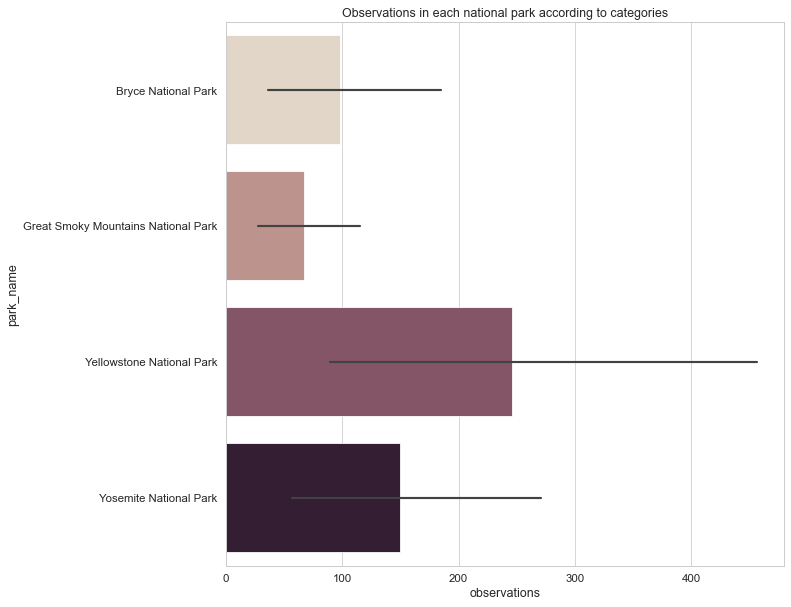

In [134]:
plt.clf()
sns.set_style('whitegrid')
sns.barplot(data=sub_df1, y='park_name', x='observations', palette="ch:.25", orient='h')
plt.title('Observations in each national park according to categories')
plt.gcf().set_size_inches(10, 10)
plt.show()

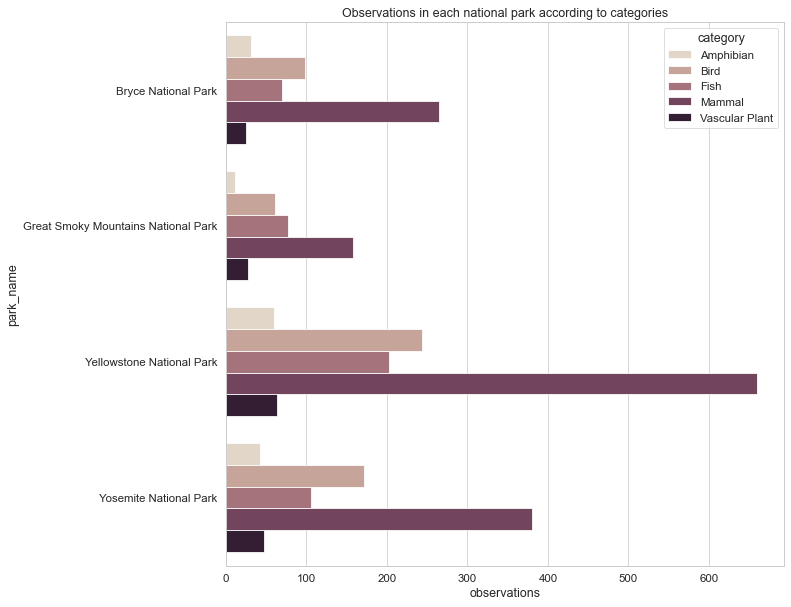

In [99]:
plt.clf()
sns.set_style('whitegrid')
sns.barplot(data=sub_df1, y='park_name', x='observations', hue='category', palette="ch:.25", orient='h')
plt.title('Observations in each national park according to categories')
plt.gcf().set_size_inches(10, 10)
plt.show()

From the bar plot abover, we can see:
- Bryce National Park
    1. Bird's, mammal's, and vascular plant's observation counts are significantly higher than the other four categories.
    2. Bird has the most observation counts, at around 7,000 observations.
- Great Smoky Mountains National Park
    1. Bird's, mammal's, and vascular plant's observation counts are significantly higher than the other four categories.
    2. Bird has the most observation counts, at around 5,000 observations.
- Yellowstone National Park
    1. Yellowstone National Park in general has the most species observations in total among all four parks. It also has the most species observations in individual category.
    2. Bird's, mammal's, and vascular plant's observation counts are significantly higher than the other four categories.
    3. Bird has over 17,000 observations, not only the highest among all categories in Yellowstone but also the highest in four national parks amphibian's observation.
- Yosemite National Park
    1. Bird's, mammal's, and vascular plant's observation counts are significantly higher than the other four categories.
    2. Bird has the most observation counts, at around 10,000 observations.

In [124]:
# now, let's take a look at individual parks
## a function that creates new dataframe for individual parks.
def create_park_df(park_name):
    df = endangered_species_observation[endangered_species_observation['park_name'] == park_name]
    
    df = df.groupby(['scientific_name', 'park_name', 'category', 'common_names', 'conservation_status']).observations.sum().reset_index()
    
    return df


In [127]:
# a function that creates bar plot for all four parks based on common names and observations
def bar_plot_common_name_observation():
    for park in endangered_species_observation.park_name.unique():
        park_df = create_park_df(park)
    
        plt.clf()
        sns.set_style('whitegrid')
        sns.set_context('paper', font_scale=1.3)
        sns.barplot(data=park_df, y='common_names', x='observations', palette="ch:.25", orient='h', order=park_df.sort_values(by=['observations'], ascending=False).common_names)
        plt.title('Endangered Species Observation in ' + park)
        plt.gcf().set_size_inches(10, 8)
        plt.show()
        

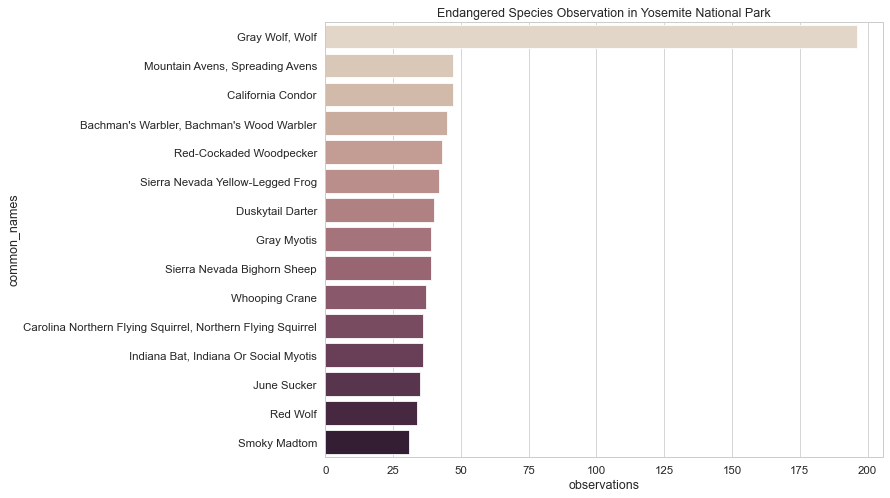

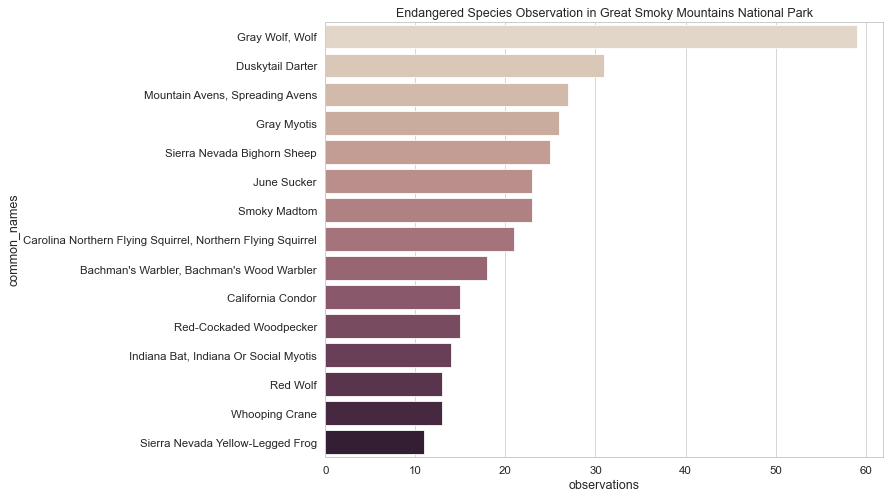

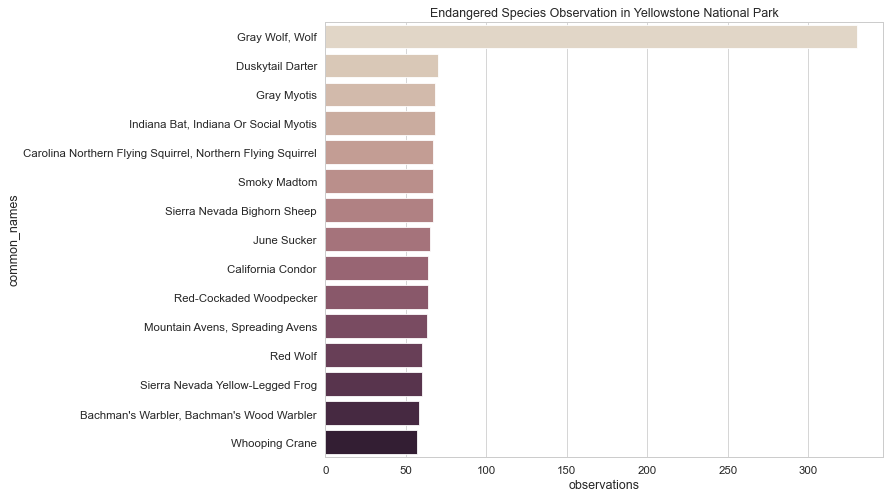

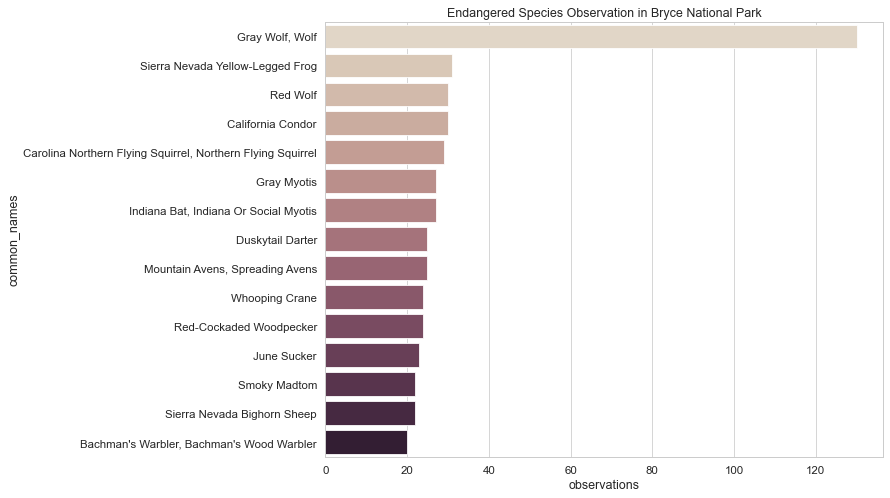

In [128]:
bar_plot_common_name_observation()

From the bar plots above, we can see:
- The Gray wolf/wolf is the most observed endangered species in all four national parks, almost three times more than the second most observed species for all parks.
- From the second to last most observed endangered species, each park is different from each other.

In [131]:
def pie_category():
    for park in endangered_species_observation.park_name.unique():
        park_df = create_park_df(park)
        
        category_count = park_df.groupby('category').observations.sum().reset_index()
        
        wedge_size = category_count['observations']
        wedge_label = category_count['category']
        
        plt.clf()
        plt.pie(wedge_size, labels=wedge_label, autopct='%d%%', startangle=90)
        plt.axis('equal')
        plt.title('Observed Endangered Categories Percentage in ' + park)
        plt.show()

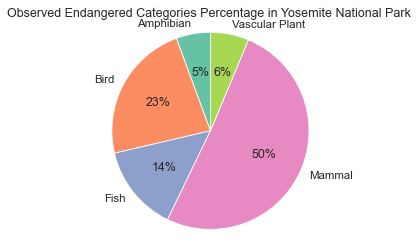

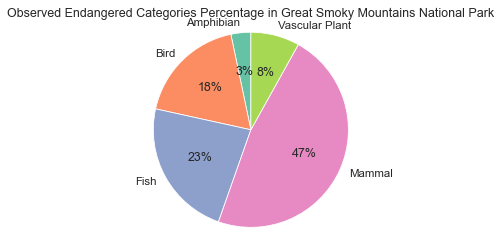

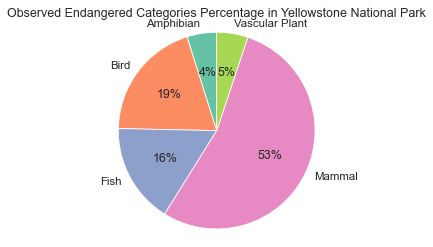

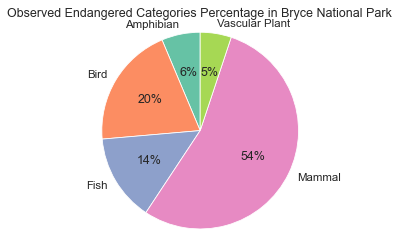

In [132]:
pie_category()

From the pie charts above, we can see
- Mammal is the most observed endangered category in all four parks, almost 50% of the entire observed endangered species category.
- Fish and bird are second and third most observed endangered species categories in all four parks.